In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()


# Lattice

## 2.1 Square lattice

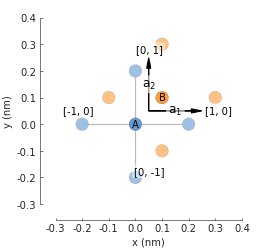

In [2]:
d = 0.2 # unict cell length
t = 1 #hopping energy


#create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d,0],a2=[0,d])
lattice.add_sublattices( ('A', [0,0]), ('B',[d/2,d/2])) # add an atom called 'A' at position [0,0]

lattice.add_hoppings(([0,1],'A','A',t), ([1,0],'A','A',t))
#순서대로 (relative_index, fromsublattice, to_sublattice, energy_value)
#the code always add complex conjugate automatically

lattice.plot()
plt.show()

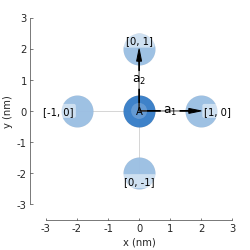

In [3]:
def square_lattice(d,t) :
    lat = pb.Lattice(a1=[d,0], a2=[0,d])
    lat.add_sublattices(('A',[0,0]))
    lat.add_hoppings(([0,1],'A','A',t), ([1,0],'A','A',t))
    
    return lat

lattice = square_lattice(2,2)
lattice.plot()
plt.show()

## 2.2 Graphene

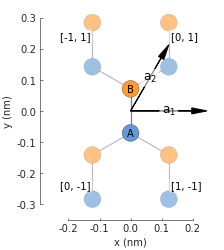

In [32]:
import math as math

def monolayer_graphene() :
    a = 0.24595 # unit cell length
    a_cc = 0.142 # carbon-carbon distance
    t = -2.8 # nearest neighbour hopping
    
    lat = pb.Lattice(a1=[a,0], a2 = [a/2,a/2*math.sqrt(3)]) #lattice vector
    
    lat.add_sublattices(('A',[0,-a_cc/2]),('B',[0,a_cc/2]))
                        
    lat.add_hoppings(
        ([0,0], 'A', 'B', t), # insite the main cell. from A to B
        ([1,-1],'A','B',t), # between neighboring cells. -> (1,-1) lattice 에 있는 B와  hopping
        ([0,-1],'A','B',t) # between neighboring cells. -> (0,-1) lattice 에 있는 B와  hopping
    )
    
    return lat


lattice = monolayer_graphene()
lattice.plot()
plt.show()

## 2.3 Brilloiun zone

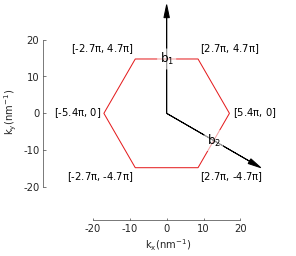

'\nThe reciprocal lattice vectors b1 and b2 are calculated automatically based on \nthe real space vectors.\nThere is no need to specify them manually.\nThe first Brillouin zone is determined as the Wigner-Seitz cell in reciprocal space.\nBy default, the plot method labels the vertices of the Brillouin zone,\n'

In [5]:
lattice = monolayer_graphene()
lattice.plot_brillouin_zone()

plt.show()

"""
The reciprocal lattice vectors b1 and b2 are calculated automatically based on 
the real space vectors.
There is no need to specify them manually.
The first Brillouin zone is determined as the Wigner-Seitz cell in reciprocal space.
By default, the plot method labels the vertices of the Brillouin zone,
"""

## 2.4 Material repository

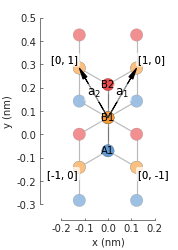

In [6]:
from pybinding.repository import graphene

lattice = graphene.bilayer()
lattice.plot()

plt.show()

# Band structure

## 3.1 Model

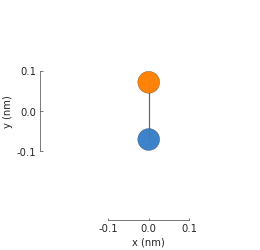

[ 0.  0.] [-0.071  0.071] [0 1]

Hamiltonian is as below
   (0, 1)	-2.8
  (1, 0)	-2.8
[[ 0.         -2.79999995]
 [-2.79999995  0.        ]]


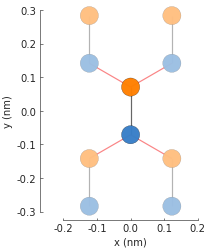

In [7]:
from pybinding.repository import graphene

model = pb.Model(graphene.monolayer())
model.plot()

plt.show()


print(model.system.x, model.system.y, model.system.sublattices)
#model.system.x -> the x-axis values of all atoms
#model.system.y - > the y-axis values of all atoms

print('\nHamiltonian is as below\n', model.hamiltonian)
print(model.hamiltonian.todense())

model = pb.Model( graphene.monolayer(), pb.translational_symmetry() )
# translational_symmetry -> add the periodicity 

model.plot() # In the plot, the red lines indicate hopping on periodic boundaries



## 3.2 Solver

In [8]:
""" 
A solver can exactly calculate the eigenvalues and eigenvectors of a Hamiltonian matrix.
"""

model = pb.Model(graphene.monolayer())
solver = pb.solver.lapack(model)
print(solver.eigenvalues, solver.eigenvectors)

[-2.79999995  2.79999995] [[-0.70710677 -0.70710677]
 [-0.70710677  0.70710677]]


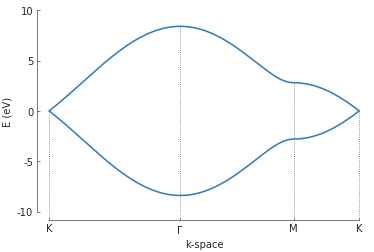

In [9]:
import math as math

model = pb.Model(graphene.monolayer(), pb.translational_symmetry())
solver = pb.solver.lapack(model)

a_cc = graphene.a_cc
Gamma = [0,0]
K1 = [-4*math.pi/(3*math.sqrt(3)*a_cc),0]
M = [0, 2*math.pi/(3*a_cc)]
K2 = [2*math.pi/ (3*math.sqrt(3)*a_cc), 2*math.pi/(3*a_cc)]

bands = solver.calc_bands(K1,Gamma,M,K2) #It calculates the band energy along that path.
bands.plot(point_labels=['K',r'$\Gamma$', 'M', 'K'])

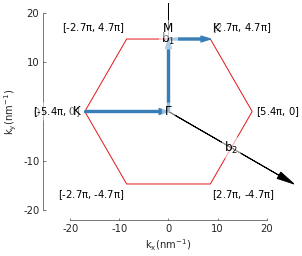

In [10]:
model.lattice.plot_brillouin_zone(decorate=True)
bands.plot_kpath(point_labels=['K',r'$\Gamma$', 'M', 'K'])

## 3.3 Switching lattices

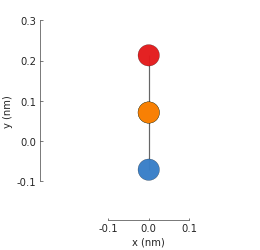

In [11]:
model = pb.Model(graphene.bilayer())
model.plot()

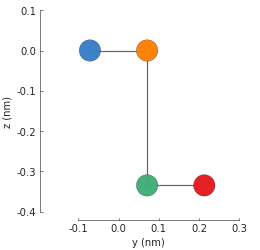

In [12]:
model.plot(axes='yz') # bilayer 이므로 z축으로도 변화 생김

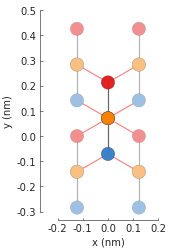

In [13]:
model_bilay_periodicity = pb.Model(graphene.bilayer(), pb.translational_symmetry())
model_bilay_periodicity.plot()
plt.show()

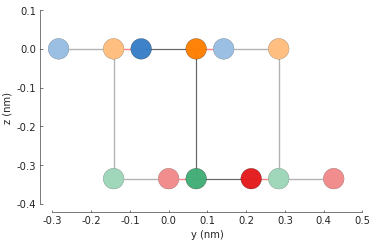

In [14]:
model_bilay_periodicity.plot(axes = 'yz')
plt.show()

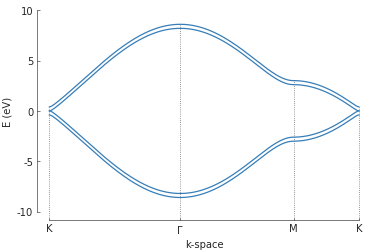

In [15]:
solver = pb.solver.lapack(model_bilay_periodicity)
bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(point_labels =['K',r'$\Gamma$', 'M', 'K'])

# Finite size

## 4.1 Primitive

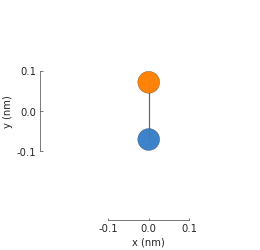

In [16]:
from pybinding.repository import graphene

model = pb.Model(graphene.monolayer())
model.plot()
plt.show()

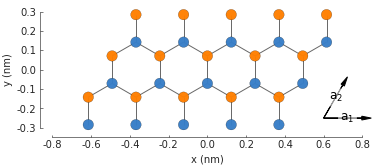

In [17]:
model = pb.Model( graphene.monolayer(), pb.primitive(a1=5,a2=3))
"""
The primitive() parameter tells the model to replicate the unit cell 5 times
in the a1 vector and 3 times in the a2 direction

This primitive cell becomes another unit cell
"""  

model.plot()
model.lattice.plot_vectors(position=[0.6,-0.25])

plt.show()

## 4.2 Polygon

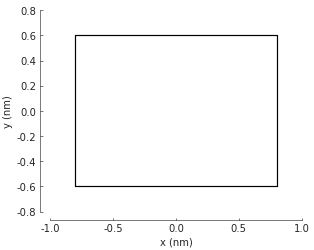

In [18]:
def rectangle (width, height) :
    x_0 = width/2
    y_0 = height/2 
    
    return pb.Polygon([[x_0,y_0],[x_0,-y_0],[-x_0,-y_0],[-x_0,y_0]]) 
            # 시계방향, 반시계방향으로만

shape = rectangle(1.6, 1.2)
shape.plot()
plt.show()

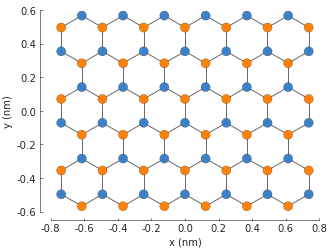

In [19]:
model_in_polygon = pb.Model(graphene.monolayer(), rectangle(1.6,1.2))

model_in_polygon.plot()
plt.show()

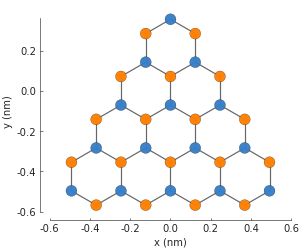

In [20]:
def triangle(width, height) :
    x_0 = width /2
    y_0 = height/2
    
    return pb.Polygon([[-x_0,-y_0],[0,y_0],[x_0,-y_0]])
    
model_in_triangle = pb.Model(graphene.monolayer(), triangle(1.6,1.2))
model_in_triangle.plot()
plt.show()

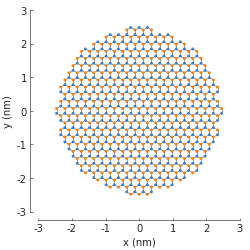

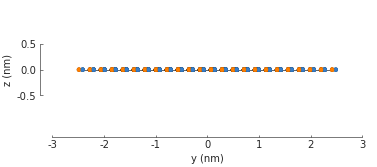

In [21]:
import numpy as np

def circle (radius) :
    def contains (x,y,z) :
        return np.sqrt(x**2 + y**2+z**2) <radius
    return pb.FreeformShape(contains, width = [2*radius, 2*radius, 2*radius])
# the width in FreeformShape speficies the boundary box width

model_in_circle = pb.Model(graphene.monolayer(), circle(radius=2.5))

model_in_circle.plot()

plt.show()

model_in_circle.plot(axes='yz')
plt.show()

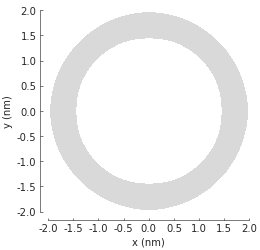

In [22]:
def ring(inner_radius, outer_radius) :
    def contains (x,y,z):
        r = np.sqrt(x**2+y**2)
        return np.logical_and(inner_radius<r, r<outer_radius)
    return pb.FreeformShape(contains,width=[2*outer_radius, 2*outer_radius])

"""
The 'and keyword can only operate on scalar values, but np.logical_and can consider
arrays. Likewise, math.sqrt does not work with arrays, but np.sqrt does
"""

ring_shape = ring(1.4, 2)
ring_shape.plot()
plt.show()

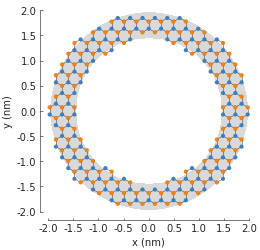

In [23]:
model_in_ring = pb.Model(graphene.monolayer(), ring(1.4, 2))

model_in_ring.plot()
model_in_ring.shape.plot()

plt.show()

## 4.4 Composite shape

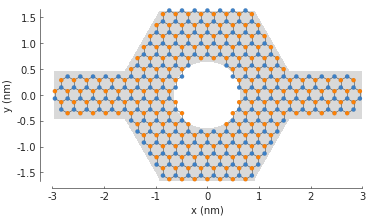

In [24]:
rectangle = pb.rectangle(x=6,y=1)
hexagon = pb.regular_polygon(num_sides=6, radius=1.92, angle=np.pi/6)
circle = pb.circle(radius=0.6)

shape = rectangle + hexagon - circle

model_in_composite_shape = pb.Model(graphene.monolayer(), shape)
model_in_composite_shape.plot()
model_in_composite_shape.shape.plot()

plt.show()

## 4.5 Spatial LDOS 

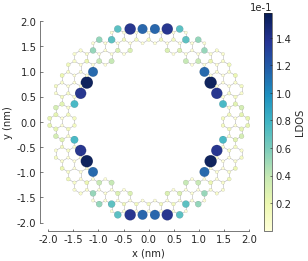

In [102]:
model = pb.Model(graphene.monolayer(), ring(1.4,2))

solver = pb.solver.arpack(model,k=20) #only the 20 lowest eigenstates

ldos = solver.calc_spatial_ldos(energy=0, broadening = 0.05)
ldos.plot(site_radius=(0.03,0.12))
pb.pltutils.colorbar(label="LDOS")



(-0.5, 0.5)

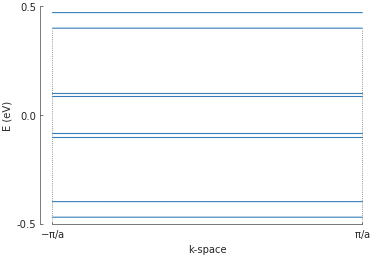

In [106]:
solver = pb.solver.arpack(model,k=20)
a = 3.8 # unit cell length
bands = solver.calc_bands(-math.pi/a, math.pi/a)
bands.plot(point_labels = ['$-\pi/a$','$\pi/a$'])
plt.ylim(-0.5,0.5)